# Data Mining for Business Analytics

## Feature Selection

Spring 2019 - Prof. George Valkanas

***


Our first step in addressing a problem is coming up with a comprehensive set of features that will be useful for our problem. This is what we often refer to as **feature engineering**. 

However, while working towards our goal, we may actually generate too many features, or features that work "against" our goal -- and there may be a few reasons for that. In situations like that, we would like to perform **feature selection**, i.e., pick a subset of the original features that we have, which would yield a better performance in the end.

We may also do feature selection so that our model is more _explainable_, because it will contain fewer features to describe / work with.

Below, we are going to discuss a few techniques that approach this problem.
***

In [9]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA, TruncatedSVD

import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
# Let's read the file
train_df = pd.read_csv("data/mail_train.tsv",  sep='\t')

# Let's print the top-5 rows
train_df.head()


,INCOME,WEALTH1,HIT,NUMPRM12,NGIFTALL,STATE_AA,STATE_AE,STATE_AK,STATE_AL,STATE_AP,...,GENDER_F,GENDER_J,GENDER_M,GENDER_U,MAJOR_,MAJOR_X,PEPSTRFL_,PEPSTRFL_X,GENDER_A,TARGET_B
0,7,9,1.0,14.0,37.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,0,1,0.0,0
1,1,4,0.0,7.0,6.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,1,0,0.0,0
2,3,3,5.0,22.0,11.0,0.0,0.0,0,0,0,...,1,0,0,0,1,0,0,1,0.0,0
3,4,4,0.0,10.0,18.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,0,1,0.0,1
4,7,9,1.0,14.0,12.0,0.0,0.0,0,0,0,...,1,0,0,0,1,0,0,1,0.0,1


In [11]:
train_feats = train_df.drop('TARGET_B', axis=1)
train_labels = train_df['TARGET_B']

### Models with Inherent Feature Selection

Certain models perform feature selection by themselves, because of how they work.

**Question:** Can you think of a model that we've seen that does that?

As we've discussed this model extensively in the past, we will not consider it here again.

*** 

### Feature Selection with $L1$-Regularization

This approach isn't always applicable due to how it works and its relevance to regularization. However, it is an interesting and useful thing to know about.

**L1** regularization performs _feature selection_ ! 

Let's see this in practice with our problem.

In [12]:
regul_df = pd.DataFrame()

for c in [100, 10, 1, 0.1, 0.01, 0.001]:
    model = LogisticRegression(C=c, penalty='l1', max_iter=1000000, solver='liblinear' ) 
    # note that penalty = "L"1, not the number 11.
    model.fit( train_feats, train_labels )

    regul_df[c] = model.coef_[0]

# Let's see what the dataframe looks like
regul_df

,100.0,10.0,1.0,0.1,0.01,0.001
0,0.069855,0.069785,0.069302,0.063521,0.000000,0.000000
1,-0.000878,-0.000953,0.000003,0.004332,-0.010449,-0.033699
2,0.003410,0.003408,0.003430,0.003211,0.001104,0.000000
3,0.011060,0.011000,0.010485,0.007083,-0.019977,-0.082135
4,0.015087,0.015070,0.015026,0.014212,0.011039,0.003463
5,0.949862,1.292703,0.000000,0.000000,0.000000,0.000000
6,5.690230,3.835011,0.000000,0.000000,0.000000,0.000000
7,-1.593230,-0.958121,-0.287484,0.000000,0.000000,0.000000
8,-0.641397,-0.094879,-0.058323,0.000000,0.000000,0.000000
9,-0.238137,0.146294,0.000000,0.000000,0.000000,0.000000


#### In-Class

Plot the dataframe above. It will be useful to plot them as `subplots` and use a `bar` kind of plot.

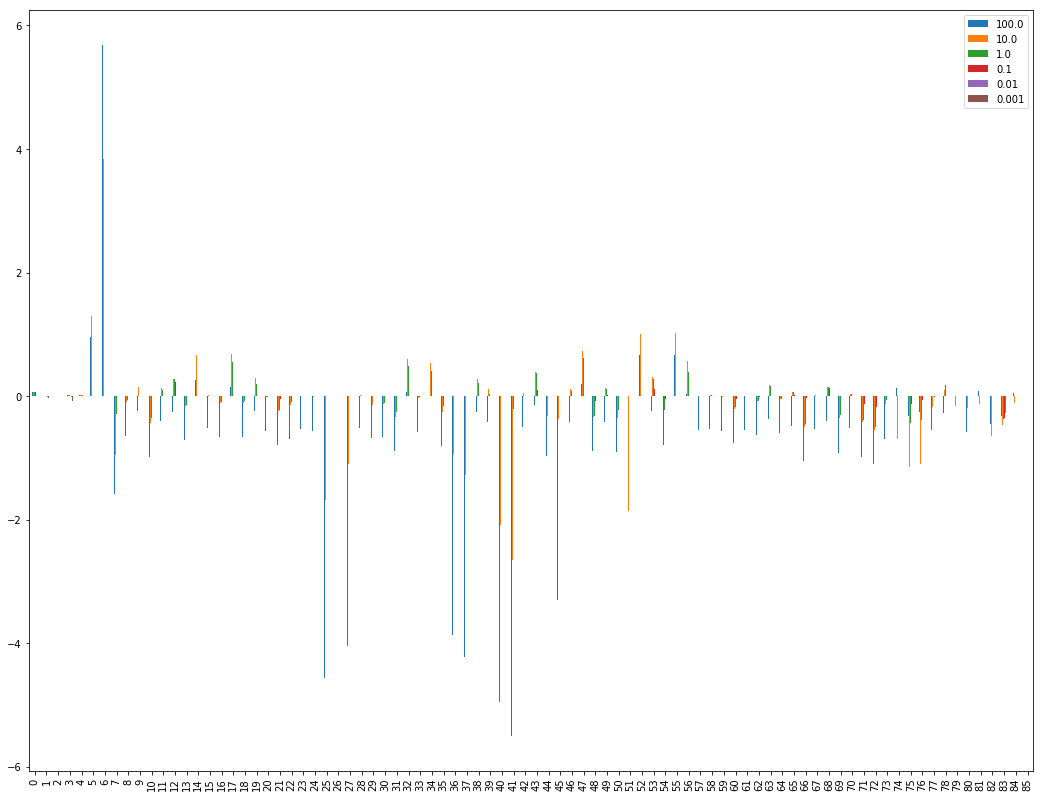

In [13]:
regul_df.plot.bar(subplots=False, figsize=(18,14))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c1e3128>,
      dtype=object)

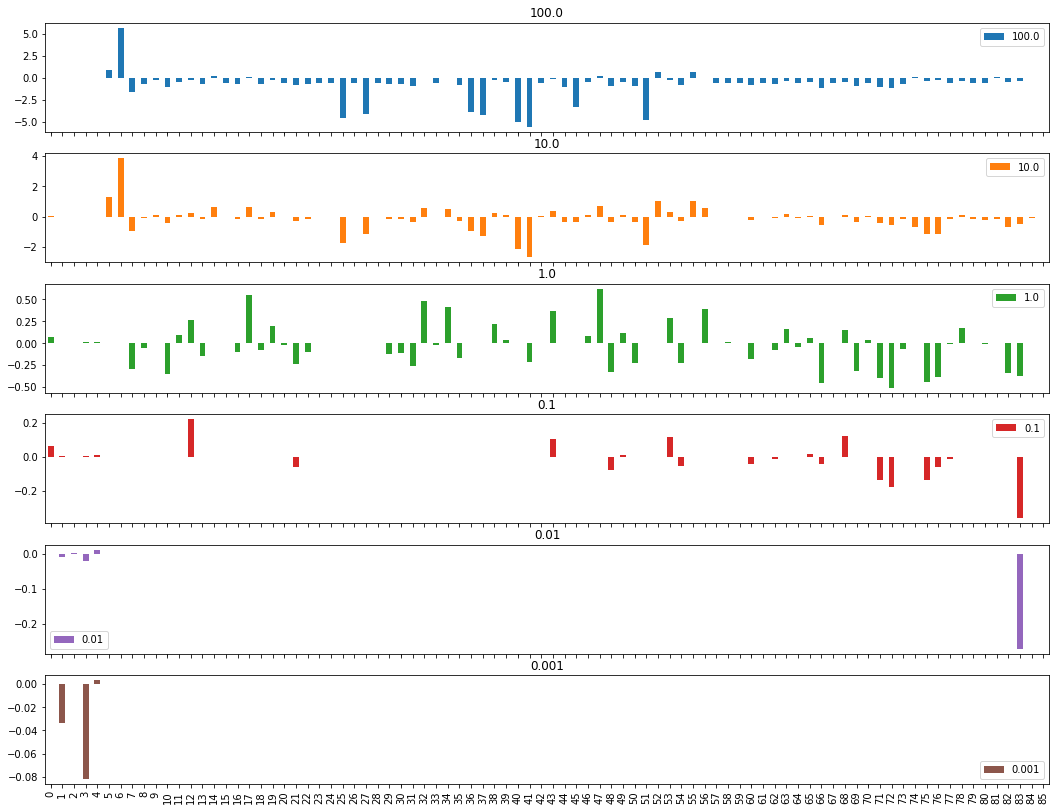

In [14]:
regul_df.plot.bar(subplots=True, figsize=(18,14))

### Forward Feature Selection

A popular technique, which has received more interest recently due to access to greater computational resources, is a process called **Forward Feature Selection**.

The process works in iterations, each time picking the single best feature which will improve the performance of a model. The performance measure is selected according to our objective (e.g., precision, AUC, accuracy, etc).


In [15]:
def check_next_subset( all_feats, labels, known_good_feats ):

    best_score = 0
    best_subset = None
    for f in all_feats.columns.tolist():

        # If we've selected this feature already, do not consider it again
        if f in known_good_feats:
            continue

        # Create a copy of the good features, so that we can append the new one
        # This will be the feature subset for this iteration
        iter_feat_subset = list(known_good_feats)
        iter_feat_subset.append(f)

        # From the dataframe, get the columns of interest
        train_subset = all_feats[iter_feat_subset]

        # For this example we are training a Logistic Regression Classifier
        # model = LogisticRegression(solver='lbfgs', )
        model = MultinomialNB()
        avg_score = np.mean( cross_val_score( model, train_subset, labels, scoring='roc_auc', cv=3 ) )

        if avg_score > best_score:
            best_score = avg_score
            best_subset = iter_feat_subset

    return best_subset, best_score



#### In-Class

Write code below that will use the method above and will help you pick the subset with the best 7 performing features.


In [16]:
all_feats = train_feats
labels = train_labels
known_good_feats = [] # nothing yet

while len(known_good_feats) < 7:
    known_good_feats, scr = check_next_subset( all_feats, labels, known_good_feats )

known_good_feats

['INCOME',
 'PEPSTRFL_ ',
 'STATE_CA',
 'HOMEOWNR_ ',
 'DOMAIN_U3',
 'STATE_TN',
 'STATE_IN']

### Dimensionality Reduction Techniques

Another popular approach for this type of problem is _dimensionality reduction_. To briefly understand PCA consider the following dataset:

<img src="https://i.stack.imgur.com/jPw90.png" width="50%" />

PCA will try to find a "line" (in this case) that "best" describes the data points. There are several such lines as we can see from the dataset below: <img src="https://i.stack.imgur.com/Q7HIP.gif" width="50%" />

And here's what the solution of this example will look like:
<img src="https://i.stack.imgur.com/lNHqt.gif" width="50%" />


Images from [this excellent answer](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues) on stack exchange regarding PCA.

The `sklearn` package approaches and works with PCA (and a similar technique, known as SVD) in the same way that we used the `CountVectorizer` package.

In [ ]:
# Simple example training PCA with 10 components (expected dimensions)
pca = PCA(n_components=10)
pca.fit(train_feats)

# Just like with count vectorizer!
train_pca_feats = pca.transform(train_feats)


#### In-Class / Take Home

Generate different PCA transformations, up to 7 components / dimensions, so that we can compare them with the previous result (forward feature selection). Use a `LogisticRegression` model.

In [ ]:
# Your code here


#### In-Class / Take Home

Plot the various performances together on the same figure to see which one performs the best.
***

In [ ]:
# Your code here